### Run This for requirements 

In [ ]:
!pip install opencv-python

In [ ]:
!git clone https://github.com/GeorgeDavila/OpenCV_Various

Cloning into 'OpenCV_Various'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 104 (delta 23), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 5.84 MiB | 17.87 MiB/s, done.
Resolving deltas: 100% (23/23), done.


Take out the stuff relevant here:

In [ ]:
!mv /content/OpenCV_Various/transparentOverlay /content/transparentOverlay

Remove the excess from the repo:

In [ ]:
!rm -r /content/OpenCV_Various

https://stackoverflow.com/questions/2466735/how-to-sparsely-checkout-only-one-single-file-from-a-git-repository/2466755#2466755

## Upload Your Image(s)

### Upload Your Image - This will be the solid background image. Only use 1 of methods below, either from local device or URL. Not both. 

### Upload Image from local device 

In [ ]:
%cd '/content/'

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Remove any previous input_image.png
!rm input_image.png

#Rename the uploaded image to input_image.png so we can just work with that name throughout 
import os

user_filename = '{name}'.format(name=fn)
os.system("mv " + user_filename + " input_image.png")

original_filename = str(user_filename).split(".")[0] #removes file type suffix by removing everything after dot "."
print(original_filename)


print('User uploaded file "{name}" should be renamed to input_image.png'.format(
      name=fn))

/content


Saving IMG_0049.JPG to IMG_0049.JPG
User uploaded file "IMG_0049.JPG" with length 2579845 bytes
rm: cannot remove 'input_image.png': No such file or directory
IMG_0049
User uploaded file "IMG_0049.JPG" should be renamed to input_image.png


### Upload Image from URL

In [ ]:
#Form to upload from url 
source_url = '' #@param {type:"string"}

from PIL import Image
from urllib.request import urlopen

#Remove any previous input_image.png
!rm input_image.png

if source_url is not None and source_url !='':
    im1 = Image.open(urlopen(source_url))
    #save the image 
    im1 = im1.save("input_image.png")
else:
    print('Provide an image url and try again.')

Provide an image url and try again.


### Upload a image to be made transparent - I provide some below, only run this if you want a custom one

In [ ]:
%cd '/content/'

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Remove any previous custom_overlay.png
!rm custom_overlay.png

#Rename the uploaded image tocustom_overlay.png so we can just work with that name throughout 
import os

user_filename = '{name}'.format(name=fn)
os.system("mv " + user_filename + " custom_overlay.png")

original_filename = str(user_filename).split(".")[0] #removes file type suffix by removing everything after dot "."
print(original_filename)


print('User uploaded file "{name}" should be renamed to custom_overlay.png'.format(
      name=fn))

# Main Program

## Resize both then Combine

**Parameter Adjustment**

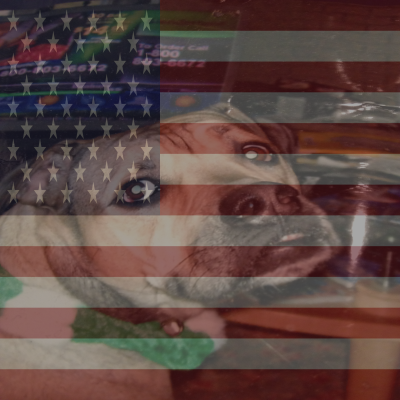

In [ ]:
#@title Default title text

alpha = 0.4 #@param {type:"slider", min:0, max:1, step:0.05}
#@markdown cv2.addWeighted function explained here: https://www.programcreek.com/python/example/89436/cv2.addWeighted
beta = 0.25 #@param {type:"slider", min:0, max:1, step:0.05}

#@markdown Cell above used alpha = 0.4, beta = 0.1 

image_size =  400 #@param {type:"slider", min:100, max:2000, step:20}
#@markdown image_size changes pixel size of the square output image. So image_size = 400 gives you a 400x400 if you want a non-square image you have to specify the width and height in the dim variable in the code 
transparent_image = "usa1.png" #@param ["usa1.png", "usa2.jpg", "usa3.jpg", "usa4.jpg", "usa5.jpg", "usa6.jpg", "usa7.png", "usa8.png", "usa9.png", "usa10.jpg", "india1.png", "mexico1.jpg", "southKorea1.png", "brazil1.png", "spain1.png", "custom_overlay.png"]

transparent_image_path = "/content/transparentOverlay/overlay_imgs/"


#Code starts here
import cv2

background = cv2.imread('input_image.png')
overlay = cv2.imread(transparent_image_path + transparent_image)

dim = ( image_size , image_size ) #(width, height)

#resize both to same size in order to merge them
background = cv2.resize(background, dim, interpolation = cv2.INTER_AREA)
overlay = cv2.resize(overlay, dim, interpolation = cv2.INTER_AREA)

added_image = cv2.addWeighted(background, alpha ,overlay, beta, 0 )

cv2.imwrite('combined_params.png', added_image)

# ==== Display the result in notebook ====
#Show image in notebook 
from IPython.display import Image
Image(filename='combined_params.png') 

### Scale the Transpaarent overlay image to fit the solid background image 

In [ ]:
import cv2

background = cv2.imread('solidimage.png') 

img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)